This notebook correlates the sharptack data with Neuropixels data

## Load sharptrack data

In [1]:
%reload_ext autoreload
%autoreload 2
from pathlib import Path
import pandas as pd
from tqdm.auto import tqdm
import xarray as xr
import seaborn as sns
import matplotlib.pylab as plt
import seaborn.objects as so
import numpy as np
from trialexp.process.anatomy import utils as anat_utils

In [2]:
base_path  = Path('/home/MRC.OX.AC.UK/ndcn1330/ettin/') # change it to your ettin path
sharp_track_path = base_path/Path('Kouichi Nakamura/Analysis/Images from Otto/20230406 kms058')/'Tapdvml_contacts.xlsx'
animal_id = 'kms058'

In [3]:
df_sharptrack = pd.read_excel(sharp_track_path)
df_sharptrack

,ap_mm,dv_mm,dv_mm_paxinos,ml_mm,annotation,name,acronym,contact_id,probe_id,depth_mm,depth_mm_paxinos,probe_AB,session_id,subject_id,probe_note,name_with_margin
0,0.150000,3.700000,2.573700,-2.820000,574,Caudoputamen,CP,1,1,2.182211,1.963423,optic fiber,NaN,NaN,NaN,boundary
1,0.150000,3.700000,2.573700,-2.820000,574,Caudoputamen,CP,2,1,2.182211,1.963423,optic fiber,NaN,NaN,NaN,boundary
2,0.153239,3.680359,2.555611,-2.822821,574,Caudoputamen,CP,3,1,2.162211,1.945428,optic fiber,NaN,NaN,NaN,boundary
3,0.153239,3.680359,2.555611,-2.822821,574,Caudoputamen,CP,4,1,2.162211,1.945428,optic fiber,NaN,NaN,NaN,boundary
4,0.156477,3.660719,2.537522,-2.825641,574,Caudoputamen,CP,5,1,2.142211,1.927434,optic fiber,NaN,NaN,NaN,Caudoputamen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,-2.943504,1.882591,0.899866,-1.410000,536,Subiculum,SUB,380,9,1.693483,1.554616,B,kms058-2023-03-14-165110,NaN,NaN,Subiculum
3452,-2.941883,1.862552,0.881410,-1.410000,536,Subiculum,SUB,381,9,1.673483,1.536256,B,kms058-2023-03-14-165110,NaN,NaN,Subiculum
3453,-2.941883,1.862552,0.881410,-1.410000,536,Subiculum,SUB,382,9,1.673483,1.536256,B,kms058-2023-03-14-165110,NaN,NaN,Subiculum
3454,-2.940261,1.842512,0.862954,-1.410000,536,Subiculum,SUB,383,9,1.653483,1.517896,B,kms058-2023-03-14-165110,NaN,NaN,Subiculum


### Load neuropixel results

In [4]:
path = base_path/Path('Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22')
files = list(Path(path).glob(f'{animal_id}*/processed/xr_spikes_trials.nc'))
files

[PosixPath('/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/kms058-2023-03-24-151254/processed/xr_spikes_trials.nc'),
 PosixPath('/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/kms058-2023-03-25-184034/processed/xr_spikes_trials.nc'),
 PosixPath('/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/kms058-2023-03-20-132658/processed/xr_spikes_trials.nc'),
 PosixPath('/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/kms058-2023-03-14-165110/processed/xr_spikes_trials.nc'),
 PosixPath('/home/MRC.OX.AC.UK/ndcn1330/ettin/Julien/Data/head-fixed/by_sessions/reaching_go_spout_bar_nov22/kms058-2023-03-23-191740/processed/xr_spikes_trials.nc')]

In [5]:
# extract the firing rate and maxwaveformCh from the xr_spikes_trials.nc xarray dataset
data_list = []
for i in tqdm(range(len(files))):
    dataset = xr.open_dataset(files[i])
    da = dataset[['firingRate','maxWaveformCh1']]
    data_list.append(da)

cell_da = xr.merge(data_list)


  0%|          | 0/5 [00:00<?, ?it/s]

In [6]:
# content of the one xr_spikes_trial
dataset

<xarray.Dataset>
Dimensions:                                 (cluID: 672, wide_idx: 1001,
                                             narrow_idx: 201, log10_idx: 100,
                                             labels_d1: 0,
                                             responseCurves_meanCCG_d1: 51,
                                             responseCurves_firingRateAcrossTime_d1: 39,
                                             waveforms_filt_std_d1: 48,
                                             ...
                                             timeWaveform_all_d1: 72,
                                             channels_all_d1: 384,
                                             peakVoltage_sorted_d1: 384,
                                             maxWaveform_all_d1: 384,
                                             trial_nb: 170, trial_phase: 6,
                                             spk_event_time: 251)
Coordinates: (12/36)
  * cluID                                   (cluID) object 'kms058-2023-03-23...
  * wide_idx                                (wide_idx) int64 0 1 2 ... 999 1000
  * narrow_idx                              (narrow_idx) int64 0 1 2 ... 199 200
  * log10_idx                               (log10_idx) int64 0 1 2 ... 97 98 99
  * labels_d1                               (labels_d1) int64 
  * responseCurves_meanCCG_d1               (responseCurves_meanCCG_d1) int64 ...
    ...                                      ...
  * channels_all_d1                         (channels_all_d1) int64 0 1 ... 383
  * peakVoltage_sorted_d1                   (peakVoltage_sorted_d1) int64 0 ....
  * maxWaveform_all_d1                      (maxWaveform_all_d1) int64 0 ... 383
  * trial_nb                                (trial_nb) float64 1.0 2.0 ... 170.0
  * trial_phase                             (trial_phase) object 'trial_onset...
  * spk_event_time                          (spk_event_time) float64 -500.0 ....
Data variables: (12/89)
    ab_ratio                                (cluID) float64 ...
    acg_wide                                (wide_idx, cluID) float64 ...
    acg_narrow                              (narrow_idx, cluID) float64 ...
    acg_log10                               (log10_idx, cluID) float64 ...
    acg_asymptote                           (cluID) float64 ...
    acg_c                                   (cluID) float64 ...
    ...                                      ...
    spikes_FR.first_spout                   (trial_nb, spk_event_time, cluID) float64 ...
    spikes_zFR.first_spout                  (trial_nb, spk_event_time, cluID) float64 ...
    spikes_FR.reward                        (trial_nb, spk_event_time, cluID) float64 ...
    spikes_zFR.reward                       (trial_nb, spk_event_time, cluID) float64 ...
    spikes_FR.pre-cue1000                   (trial_nb, spk_event_time, cluID) float64 ...
    spikes_zFR.pre-cue1000                  (trial_nb, spk_event_time, cluID) float64 ...
Attributes: (12/16)
    chanCoords_x:                             [16 48  0 32 16 48  0 32 16 48 ...
    chanCoords_y:                             [   0    0   20   20   40   40 ...
    chanCoords_source:                        channel_positions.npy
    chanCoords_verticalSpacing:               10
    chanCoords_layout:                        poly2
    putativeConnections_excitatory:           [[ 17  13]\n [413  42]\n [ 44  ...
    ...                                       ...
    task_folder:                              reaching_go_spout_bar_nov22
    probe_names:                              ['ProbeA', 'ProbeB']
    bin_duration:                             10
    sigma_ms:                                 20
    kernel:                                   ExponentialKernel
    trial_window:                             [ 500 2000]

In [7]:
df_cell = cell_da.to_dataframe().reset_index()
df_cell = anat_utils.format_cell4merge(df_cell)
df_cell

,cluID,firingRate,maxWaveformCh1,session_id,probe,id,session_date
0,kms058-2023-03-14-165110_ProbeA_15,0.236153,53.0,kms058-2023-03-14-165110,A,15,kms058-2023-03-14
1,kms058-2023-03-14-165110_ProbeA_52,0.216764,250.0,kms058-2023-03-14-165110,A,52,kms058-2023-03-14
2,kms058-2023-03-14-165110_ProbeA_53,2.261256,270.0,kms058-2023-03-14-165110,A,53,kms058-2023-03-14
3,kms058-2023-03-14-165110_ProbeA_54,0.181044,270.0,kms058-2023-03-14-165110,A,54,kms058-2023-03-14
4,kms058-2023-03-14-165110_ProbeA_57,0.331661,270.0,kms058-2023-03-14-165110,A,57,kms058-2023-03-14
...,...,...,...,...,...,...,...
2778,kms058-2023-03-25-184034_ProbeB_986,0.074024,363.0,kms058-2023-03-25-184034,B,986,kms058-2023-03-25
2779,kms058-2023-03-25-184034_ProbeB_988,0.063241,365.0,kms058-2023-03-25-184034,B,988,kms058-2023-03-25
2780,kms058-2023-03-25-184034_ProbeB_991,0.124315,364.0,kms058-2023-03-25-184034,B,991,kms058-2023-03-25
2781,kms058-2023-03-25-184034_ProbeB_997,0.999803,361.0,kms058-2023-03-25-184034,B,997,kms058-2023-03-25


### Match sharptrack to cluster

In [9]:
# There may be multiple recordings on the same date, but usually only 1 probe penetration
# so here we merge based on the date instead of the sesison_id

df_sharptrack['session_date'] = df_sharptrack['session_id'].apply(anat_utils.get_session_date)

df_cell_merge = df_cell.merge(df_sharptrack, left_on=['session_date','probe','maxWaveformCh1'],
                              right_on = ['session_date', 'probe_AB','contact_id'])
df_cell_merge.head()

,cluID,firingRate,maxWaveformCh1,session_id_x,probe,id,session_date,ap_mm,dv_mm,dv_mm_paxinos,...,acronym,contact_id,probe_id,depth_mm,depth_mm_paxinos,probe_AB,session_id_y,subject_id,probe_note,name_with_margin
0,kms058-2023-03-14-165110_ProbeB_1,0.684621,4.0,kms058-2023-03-14-165110,B,1,kms058-2023-03-14,-3.248378,5.649961,4.369614,...,cpd,4,9,5.453483,5.006292,B,kms058-2023-03-14-165110,NaN,NaN,cerebal peduncle
1,kms058-2023-03-14-165110_ProbeB_100,9.856220,71.0,kms058-2023-03-14-165110,B,100,kms058-2023-03-14,-3.193242,4.968628,3.742106,...,SNr,71,9,4.773483,4.382053,B,kms058-2023-03-14-165110,NaN,NaN,boundary
2,kms058-2023-03-14-165110_ProbeB_103,42.265543,83.0,kms058-2023-03-14-165110,B,103,kms058-2023-03-14,-3.183512,4.848393,3.631370,...,MB,83,9,4.653483,4.271893,B,kms058-2023-03-14-165110,NaN,NaN,Midbrain
3,kms058-2023-03-14-165110_ProbeB_116,24.727193,83.0,kms058-2023-03-14-165110,B,116,kms058-2023-03-14,-3.183512,4.848393,3.631370,...,MB,83,9,4.653483,4.271893,B,kms058-2023-03-14-165110,NaN,NaN,Midbrain
4,kms058-2023-03-14-165110_ProbeB_104,3.466558,85.0,kms058-2023-03-14-165110,B,104,kms058-2023-03-14,-3.181890,4.828353,3.612914,...,MB,85,9,4.633483,4.253533,B,kms058-2023-03-14-165110,NaN,NaN,Midbrain


In [10]:
df_cell_probe= df_cell_merge[(df_cell_merge.probe_AB=='A') & (df_cell_merge.session_date == 'kms058-2023-03-23')].copy()
df_cell_probe.head()

,cluID,firingRate,maxWaveformCh1,session_id_x,probe,id,session_date,ap_mm,dv_mm,dv_mm_paxinos,...,acronym,contact_id,probe_id,depth_mm,depth_mm_paxinos,probe_AB,session_id_y,subject_id,probe_note,name_with_margin
649,kms058-2023-03-23-191740_ProbeA_0,10.377260,6.0,kms058-2023-03-23-191740,A,0,kms058-2023-03-23,-0.31714,6.271909,4.942429,...,AAA,6,4,5.070167,4.423555,A,kms058-2023-03-23-191740,NaN,NaN,Anterior amygdalar area
650,kms058-2023-03-23-191740_ProbeA_1,10.543664,6.0,kms058-2023-03-23-191740,A,1,kms058-2023-03-23,-0.31714,6.271909,4.942429,...,AAA,6,4,5.070167,4.423555,A,kms058-2023-03-23-191740,NaN,NaN,Anterior amygdalar area
651,kms058-2023-03-23-191740_ProbeA_13,0.038431,6.0,kms058-2023-03-23-191740,A,13,kms058-2023-03-23,-0.31714,6.271909,4.942429,...,AAA,6,4,5.070167,4.423555,A,kms058-2023-03-23-191740,NaN,NaN,Anterior amygdalar area
652,kms058-2023-03-23-191740_ProbeA_17,0.098811,6.0,kms058-2023-03-23-191740,A,17,kms058-2023-03-23,-0.31714,6.271909,4.942429,...,AAA,6,4,5.070167,4.423555,A,kms058-2023-03-23-191740,NaN,NaN,Anterior amygdalar area
653,kms058-2023-03-23-191740_ProbeA_6,31.373251,6.0,kms058-2023-03-23-191740,A,6,kms058-2023-03-23,-0.31714,6.271909,4.942429,...,AAA,6,4,5.070167,4.423555,A,kms058-2023-03-23-191740,NaN,NaN,Anterior amygdalar area


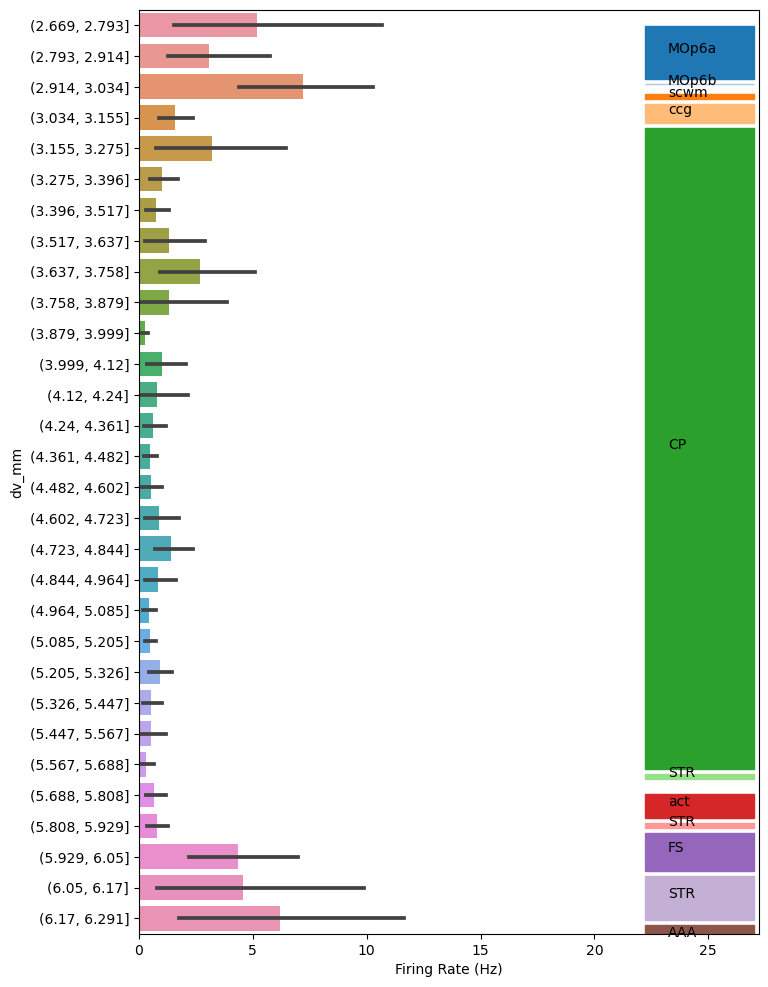

In [11]:
# TODO: figure out the best way to display aggregated data from multiple sessions
anat_utils.plot_firing_rate_regions(df_cell_probe)

<Axes: xlabel='firingRate', ylabel='name'>

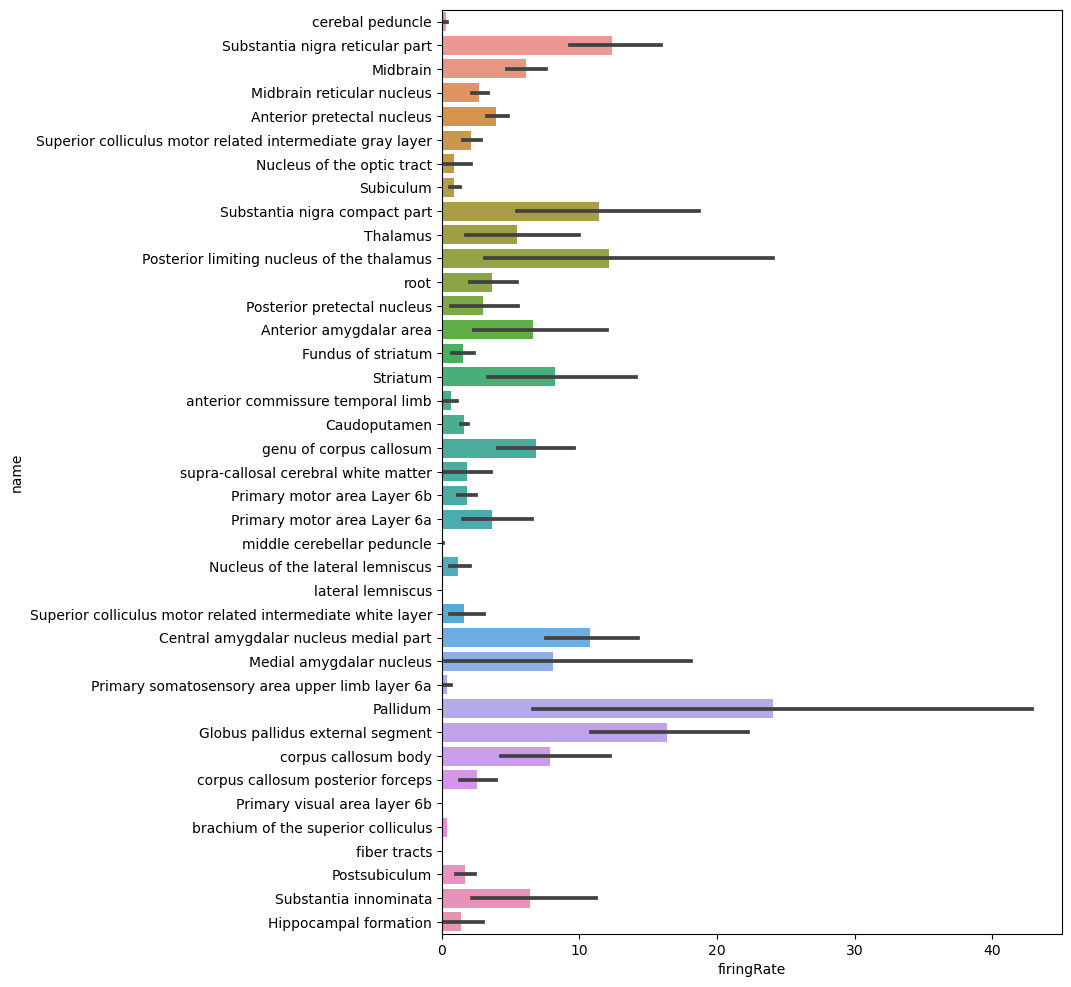

In [12]:
plt.figure(figsize=(8,12))
sns.barplot(df_cell_merge, y='name', x='firingRate')